In [31]:
NAMES = [
    "pink primrose", "hard-leaved pocket orchid", "canterbury bells",
    "sweet pea", "english marigold", "tiger lily", "moon orchid",
    "bird of paradise", "monkshood", "globe thistle", "snapdragon",
    "colt's foot", "king protea", "spear thistle", "yellow iris",
    "globe-flower", "purple coneflower", "peruvian lily", "balloon flower",
    "giant white arum lily", "fire lily", "pincushion flower", "fritillary",
    "red ginger", "grape hyacinth", "corn poppy", "prince of wales feathers",
    "stemless gentian", "artichoke", "sweet william", "carnation",
    "garden phlox", "love in the mist", "mexican aster", "alpine sea holly",
    "ruby-lipped cattleya", "cape flower", "great masterwort", "siam tulip",
    "lenten rose", "barbeton daisy", "daffodil", "sword lily", "poinsettia",
    "bolero deep blue", "wallflower", "marigold", "buttercup", "oxeye daisy",
    "common dandelion", "petunia", "wild pansy", "primula", "sunflower",
    "pelargonium", "bishop of llandaff", "gaura", "geranium", "orange dahlia",
    "pink-yellow dahlia?", "cautleya spicata", "japanese anemone",
    "black-eyed susan", "silverbush", "californian poppy", "osteospermum",
    "spring crocus", "bearded iris", "windflower", "tree poppy", "gazania",
    "azalea", "water lily", "rose", "thorn apple", "morning glory",
    "passion flower", "lotus", "toad lily", "anthurium", "frangipani",
    "clematis", "hibiscus", "columbine", "desert-rose", "tree mallow",
    "magnolia", "cyclamen", "watercress", "canna lily", "hippeastrum",
    "bee balm", "ball moss", "foxglove", "bougainvillea", "camellia", "mallow",
    "mexican petunia", "bromelia", "blanket flower", "trumpet creeper",
    "blackberry lily"
]

In [183]:
import scipy.io
labels = scipy.io.loadmat('imagelabels.mat')
labels = labels['labels'][0]

split_index = scipy.io.loadmat('setid.mat')
train_id = split_index['trnid'][0]
val_id = split_index['valid'][0]
test_id = split_index['tstid'][0]

In [50]:
train_id==0

False

In [46]:
print(len(train_id))
print(len(test_id))
print(len(val_id))

1020
6149
1020


In [20]:
import pandas as pd
labels = pd.DataFrame(mat['labels'][0])

In [23]:
labels.columns = ['labels']

In [12]:
mat = scipy.io.loadmat('setid.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 17:38:58 2009',
 '__version__': '1.0',
 '__globals__': [],
 'trnid': array([[6765, 6755, 6768, ..., 8026, 8036, 8041]], dtype=uint16),
 'valid': array([[6773, 6767, 6739, ..., 8028, 8008, 8030]], dtype=uint16),
 'tstid': array([[6734, 6735, 6737, ..., 8044, 8045, 8047]], dtype=uint16)}

In [114]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

import keras
#from google.colab import drive
#import gc
from shutil import copyfile
from zipfile import ZipFile

import matplotlib.pyplot as plt

In [118]:
from keras.preprocessing import image as kimage

In [170]:
def from_image_to_array (source):
    list_image = []
    for file_image in os.listdir(source):
        path_image = source + '/' + file_image
        img = kimage.load_img(path_image, target_size = (224,224))
        image_array = kimage.img_to_array(img)
        list_image.append(image_array)
    data = np.array(list_image)
    return data

In [171]:
X_train = from_image_to_array('102flowers_train')
X_train.shape

In [173]:
X_test= from_image_to_array('102flowers_test')
X_test.shape

(6149, 224, 224, 3)

In [174]:
X_val = from_image_to_array('102flowers_val')
X_val.shape

(1020, 224, 224, 3)

In [178]:
import pickle
with open('102flowers_val.pickle', 'wb') as handle:
    pickle.dump(X_val, handle)

In [163]:
a = [1,2,3]
pd.DataFrame(a)

,0
0,1
1,2
2,3


In [162]:
len(list_image)

1020

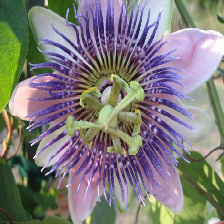

In [159]:
X_train.shape

In [149]:
train = '102flowers_train'
image = '/image_00888.jpg'
train + image

'102flowers_train/image_00888.jpg'

In [153]:
image = kimage.load_img('102flowers_train/image_00036.jpg', target_size = (224,224))

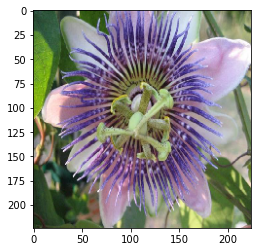

In [154]:
plt.imshow(image)

In [157]:
x = kimage.img_to_array(image)
x.shape

(224, 224, 3)

In [156]:
x.astype('float32')/255.0

array([[[0.17254902, 0.3019608 , 0.23529412],
        [0.18431373, 0.3137255 , 0.24705882],
        [0.15294118, 0.28627452, 0.21960784],
        ...,
        [0.45882353, 0.49019608, 0.32941177],
        [0.40784314, 0.4509804 , 0.28627452],
        [0.3647059 , 0.41568628, 0.24705882]],

       [[0.16078432, 0.28235295, 0.21960784],
        [0.18431373, 0.3137255 , 0.24705882],
        [0.18039216, 0.3137255 , 0.24705882],
        ...,
        [0.47058824, 0.5019608 , 0.34117648],
        [0.42745098, 0.47058824, 0.30588236],
        [0.36078432, 0.4117647 , 0.24313726]],

       [[0.12941177, 0.2509804 , 0.18039216],
        [0.14901961, 0.27058825, 0.2       ],
        [0.21568628, 0.34509805, 0.27058825],
        ...,
        [0.5137255 , 0.54509807, 0.38431373],
        [0.4392157 , 0.48235294, 0.31764707],
        [0.36078432, 0.4117647 , 0.24313726]],

       ...,

       [[0.14117648, 0.22352941, 0.09411765],
        [0.15294118, 0.23529412, 0.11372549],
        [0.14117648, 0

In [115]:
train_processing = keras.preprocessing.image.ImageDataGenerator(preprocessing_function= vgg16.preprocess_input)
train_generator= train_processing.flow_from_directory(
    directory='102flowers_train',
    target_size=(224,224),
    color_mode= 'rgb',
    batch_size = 1020 ,
    class_mode = 'categorical',
    shuffle = True,
    seed = 1
)
X_train, y_train = next(train_generator)

Found 0 images belonging to 0 classes.


In [ ]:
x = kimage.img_to_array(img)

In [ ]:
X_train = train_generator

In [ ]:
plt.imshow(x_train[0], cmap='gray')

In [52]:
import shutil

In [98]:
source = "102flowers_train"
dest1 = "102flowers_test"
dest2 = "102flowers_val"

list_files = os.listdir(source)
for i in range(len(list_files)):
    print ('image', i)
    if i not in (train_id-1):
        if i in (test_id-1):
            if not os.path.exists(dest1):
                os.makedirs(dest1)
            shutil.move(source+ '/'+ list_files[i], dest1 + '/' + list_files[i])
        else:
            if not os.path.exists(dest2):
                os.makedirs(dest2)
            shutil.move(source+ '/'+ list_files[i], dest2 + '/' + list_files[i])


0
image 6371
image 6372
image 6373
image 6374
image 6375
image 6376
image 6377
image 6378
image 6379
image 6380
image 6381
image 6382
image 6383
image 6384
image 6385
image 6386
image 6387
image 6388
image 6389
image 6390
image 6391
image 6392
image 6393
image 6394
image 6395
image 6396
image 6397
image 6398
image 6399
image 6400
image 6401
image 6402
image 6403
image 6404
image 6405
image 6406
image 6407
image 6408
image 6409
image 6410
image 6411
image 6412
image 6413
image 6414
image 6415
image 6416
image 6417
image 6418
image 6419
image 6420
image 6421
image 6422
image 6423
image 6424
image 6425
image 6426
image 6427
image 6428
image 6429
image 6430
image 6431
image 6432
image 6433
image 6434
image 6435
image 6436
image 6437
image 6438
image 6439
image 6440
image 6441
image 6442
image 6443
image 6444
image 6445
image 6446
image 6447
image 6448
image 6449
image 6450
image 6451
image 6452
image 6453
image 6454
image 6455
image 6456
image 6457
image 6458
image 6459
image 6460
image 64

In [184]:
y_train = labels[train_id-1] # -1 perchè gli indici partono da 1 e non da 0
y_val = labels[val_id-1]
y_test = labels[test_id-1]


In [186]:
with open('102flowers_y_train.pickle', 'wb') as handle:
    pickle.dump(y_train, handle)
with open('102flowers_y_test.pickle', 'wb') as handle:
    pickle.dump(y_test, handle)
with open('102flowers_y_val.pickle', 'wb') as handle:
    pickle.dump(y_val, handle)

In [185]:
y_train.shape

(1020,)